# Rede Hopfield

## Pré-processamento

Inportação de bibliotecas e pré-processamento do banco de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

treinamento = "/Padrões de entrada.csv"
desconhecidos = "/Padões desconhecidos.csv"

df_treinamento = pd.read_csv(treinamento, header=None)
df_desconhecidos = pd.read_csv(desconhecidos, header=None)

# Transformando em uma matriz para cada conjunto
matriz_treinamento = np.array(df_treinamento.values.tolist())
matriz_desconhecidos = np.array(df_desconhecidos.values.tolist())

## Apresentação dos dados

In [2]:
# Retornar cada linha, para uma matriz
def gerar_imagens(linha):
    tamanho = int(np.sqrt(len(linha)))
    imagem = np.array(linha).reshape((tamanho, tamanho))
    return imagem

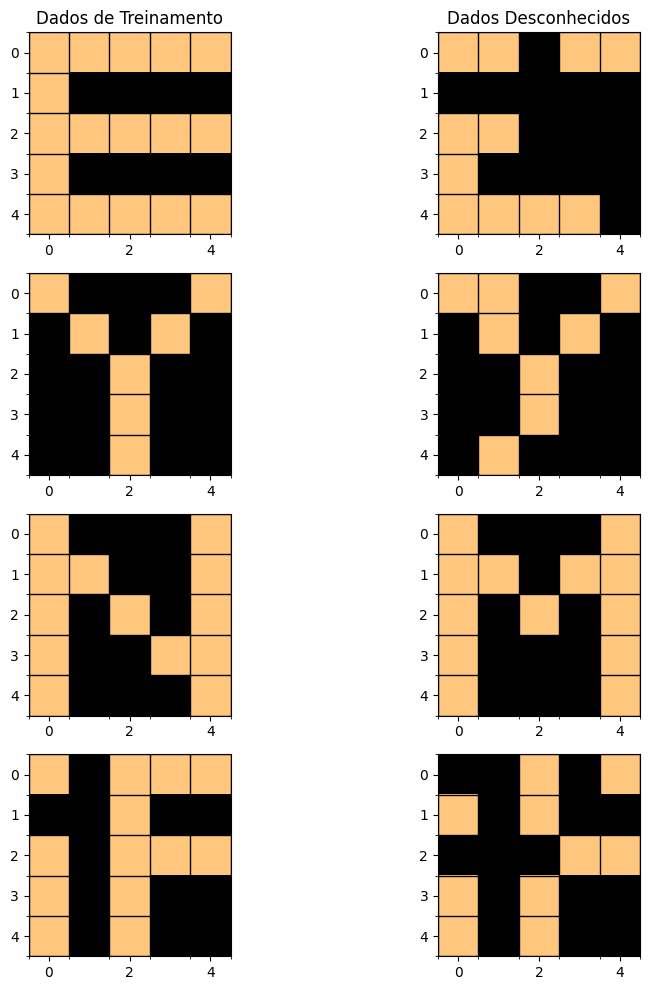

In [3]:
# Gerar um conjunto de "imagens" para cada conjunto de dados
conjunto_imagens_treinamento = [gerar_imagens(linha) for linha in matriz_treinamento]
conjunto_imagens_desconhecidos = [gerar_imagens(linha) for linha in matriz_desconhecidos]

# Exibir as figuras
num_linhas = len(conjunto_imagens_treinamento)
fig, axs = plt.subplots(num_linhas, 2, figsize=(10, 10))  # X linhas, duas colunas


axs[0, 0].set_title('Dados de Treinamento')
for i, matriz in enumerate(conjunto_imagens_treinamento):
    axs[i, 0].imshow(matriz, cmap='copper', vmin=-1, vmax=1)
    axs[i, 0].set_xticks(np.arange(-0.5, matriz.shape[1], 1), minor=True)
    axs[i, 0].set_yticks(np.arange(-0.5, matriz.shape[0], 1), minor=True)
    axs[i, 0].grid(which='minor', color='black', linestyle='-', linewidth=1)

axs[0, 1].set_title('Dados Desconhecidos')
for j, matriz in enumerate(conjunto_imagens_desconhecidos):
    axs[j, 1].imshow(matriz, cmap='copper', vmin=-1, vmax=1)
    axs[j, 1].set_xticks(np.arange(-0.5, matriz.shape[1], 1), minor=True)
    axs[j, 1].set_yticks(np.arange(-0.5, matriz.shape[0], 1), minor=True)
    axs[j, 1].grid(which='minor', color='black', linestyle='-', linewidth=1)

plt.tight_layout()  # Ajustar o layout
plt.show()

## Treinamento da rede Hopfield

In [4]:
def somatorio_treinamento(coluna, n):
  res = np.outer(coluna.T, coluna)
  return res * (1/n)

In [5]:
def produto_identidade(n, p):
  matriz_identidade = np.eye(n)
  return (p/n) * matriz_identidade

In [6]:
n = len(matriz_treinamento[0]) # n = 25
p = len(matriz_treinamento)    # p = 4
W = np.zeros((n, n))           # matriz de 25 x 25 com apenas 0

for linha in matriz_treinamento:
  W += somatorio_treinamento(linha, n)
W -= produto_identidade(n, p)

## Teste da rede Hopfield

In [7]:
# função signal
def signal(matriz):
  for i, elemento in enumerate(matriz):
      if elemento > 0:
          matriz[i] = 1
      elif elemento < 0:
          matriz[i] = -1
      else:
          matriz[i] = 1
  return matriz

In [8]:
def calcular_atual(matrizPesos, coluna):
  resposta = np.dot(coluna , matrizPesos) # A linha deve ser coluna
  return signal(resposta) #np.sign() => se 0 retorna 0

In [9]:
matriz_reconstruidos = np.zeros_like(matriz_desconhecidos)
for i, linha in enumerate(matriz_desconhecidos):
  atual = calcular_atual(W, linha)
  while(not np.array_equal(linha, atual)):
    linha = atual
    atual = calcular_atual(W, atual)
  matriz_reconstruidos[i] = atual # AQUI ESTAVA PASSANDO A LINHA, E NÃO O CALCULADO

## Apresentação de resultados

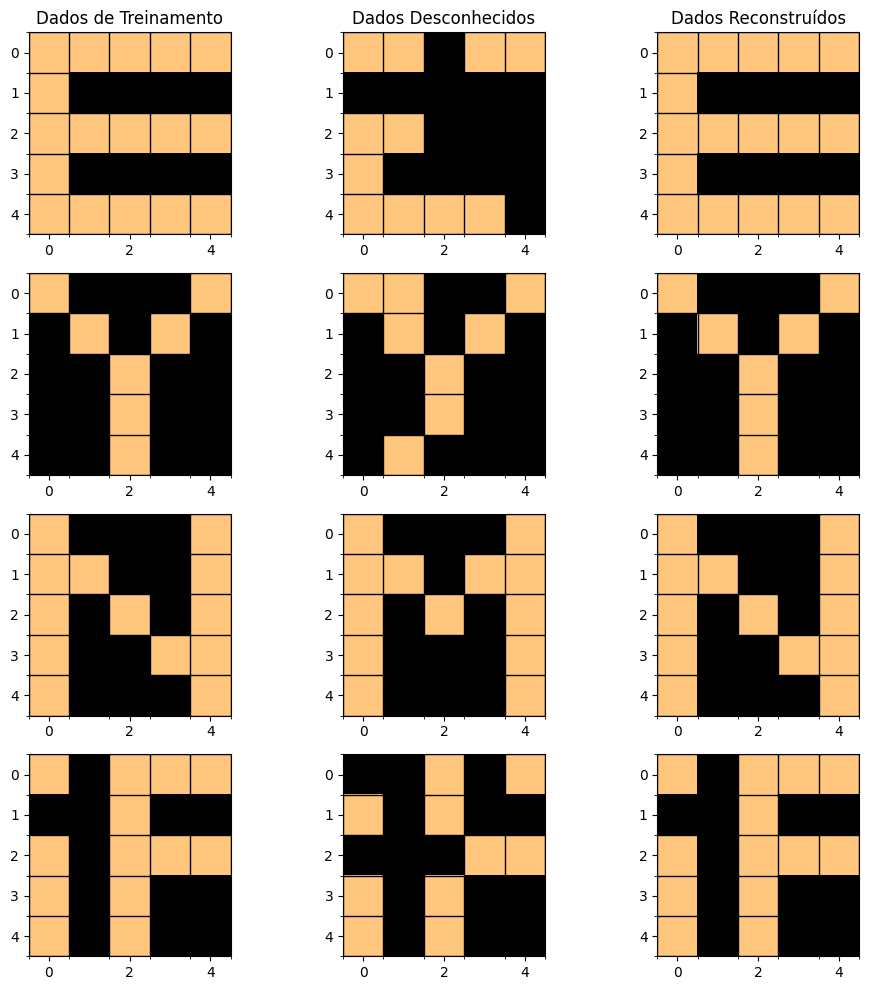

In [10]:
# Gerar um conjunto de "imagens" para cada conjunto de dados
conjunto_imagens_reconstruidos = [gerar_imagens(linha) for linha in matriz_reconstruidos]

# Exibir as figuras
num_linhas = len(conjunto_imagens_treinamento)
fig, axs = plt.subplots(num_linhas, 3, figsize=(10, 10))  # X linhas, três colunas


axs[0, 0].set_title('Dados de Treinamento')
for i, matriz in enumerate(conjunto_imagens_treinamento):
    axs[i, 0].imshow(matriz, cmap='copper', vmin=-1, vmax=1)
    axs[i, 0].set_xticks(np.arange(-0.5, matriz.shape[1], 1), minor=True)
    axs[i, 0].set_yticks(np.arange(-0.5, matriz.shape[0], 1), minor=True)
    axs[i, 0].grid(which='minor', color='black', linestyle='-', linewidth=1)

axs[0, 1].set_title('Dados Desconhecidos')
for j, matriz in enumerate(conjunto_imagens_desconhecidos):
    axs[j, 1].imshow(matriz, cmap='copper', vmin=-1, vmax=1)
    axs[j, 1].set_xticks(np.arange(-0.5, matriz.shape[1], 1), minor=True)
    axs[j, 1].set_yticks(np.arange(-0.5, matriz.shape[0], 1), minor=True)
    axs[j, 1].grid(which='minor', color='black', linestyle='-', linewidth=1)

axs[0, 2].set_title('Dados Reconstruídos')
for k, matriz in enumerate(conjunto_imagens_reconstruidos):
    axs[k, 2].imshow(matriz, cmap='copper', vmin=-1, vmax=1)
    axs[k, 2].set_xticks(np.arange(-0.5, matriz.shape[1], 1), minor=True)
    axs[k, 2].set_yticks(np.arange(-0.5, matriz.shape[0], 1), minor=True)
    axs[k, 2].grid(which='minor', color='black', linestyle='-', linewidth=1)

plt.tight_layout()  # Ajustar o layout
plt.show()